In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
FD = pd.read_excel('/Users/User/Desktop/Fire_Data.xlsx')

In [3]:
FD

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [4]:
FD['Time'] = pd.to_datetime(FD['ACQ_DATE']).astype(np.int64)

In [5]:
FD['Hour'] = pd.to_datetime(FD['ACQ_TIME']/100).astype(np.int64)

In [6]:
FD['Min'] = pd.to_datetime(FD['ACQ_TIME']%100).astype(np.int64)

In [7]:
FD['Total_Sec'] = pd.to_datetime(FD['Hour']*3600e9+FD['Min']*60e9).astype(np.int64)

In [8]:
FD['Final_Time'] = pd.to_datetime(FD['Total_Sec']+FD['Time']).astype(np.int64)

In [9]:
FD['DateTime'] = pd.to_datetime(FD['Final_Time'])

In [36]:
data = FD[['LATITUDE','LONGITUDE','Time']]

In [37]:
data2=data.head(800)
data2

,LATITUDE,LONGITUDE,Time
0,16.33696,98.70137,1575158400000000000
1,16.48906,98.73961,1575158400000000000
2,16.93571,99.06874,1575158400000000000
3,16.54092,98.59869,1575158400000000000
4,16.87473,98.63222,1575158400000000000
...,...,...,...
795,19.32708,100.02614,1575763200000000000
796,20.16325,99.85246,1575763200000000000
797,19.39145,100.14629,1575763200000000000
798,20.13434,100.05583,1575763200000000000


In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=120

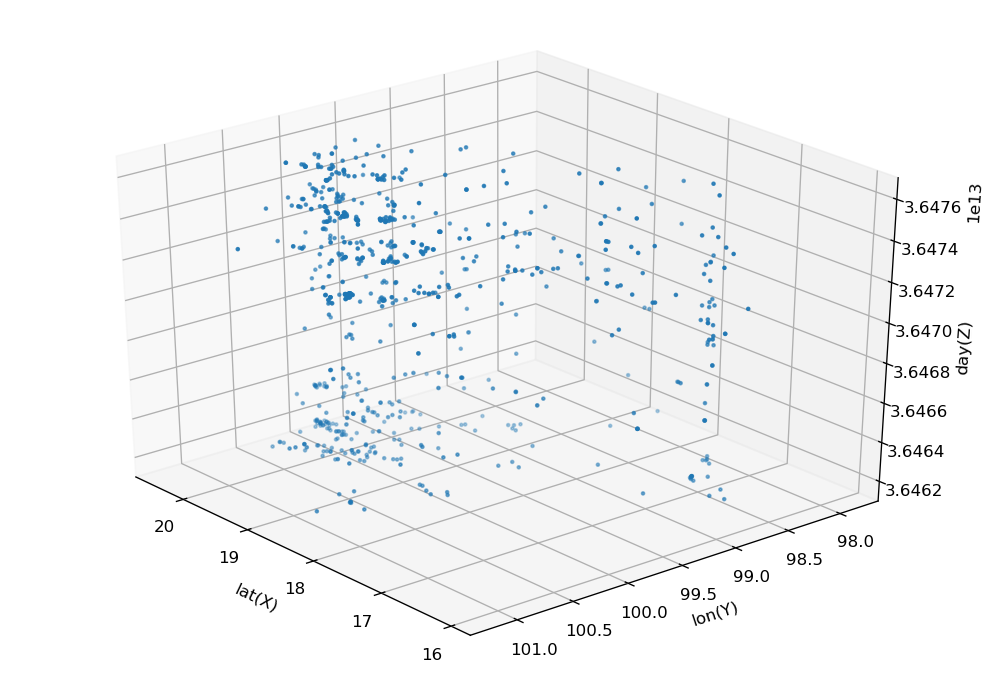

In [40]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2['LATITUDE'], data2['LONGITUDE'], data2['Time']/43200, s=3)
ax.view_init(azim=140)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('day(Z)')
plt.show()

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [42]:
latt = np.array(dataset2.values.tolist())
latt

array([[1.6336960e+01, 9.8701370e+01, 1.5751584e+18],
       [1.6489060e+01, 9.8739610e+01, 1.5751584e+18],
       [1.6935710e+01, 9.9068740e+01, 1.5751584e+18],
       ...,
       [1.9391450e+01, 1.0014629e+02, 1.5757632e+18],
       [2.0134340e+01, 1.0005583e+02, 1.5757632e+18],
       [1.9464380e+01, 1.0034093e+02, 1.5757632e+18]])

In [43]:
db = DBSCAN(eps=3, min_samples=20).fit(latt)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

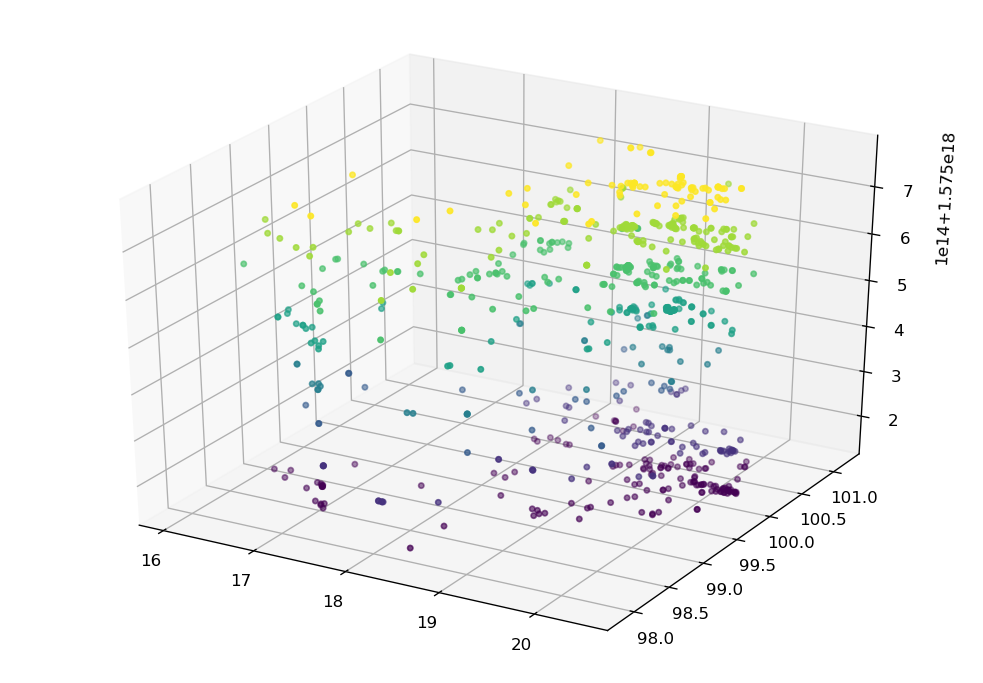

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(latt[:,0], latt[:,1], latt[:,2], c=dblabels, s=10)
#ax.view_init(azim=200)
plt.show()

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(latt, dblabels)

1.0

การทำ Density Based มีกำหนดค่า eps = 3 เนื่องจากแกน x,y มี range ค่อนข้างแคบ ค่า Silhoulette score = 1.0 แปลว่า แบบจำลองดีมาก ข้อมูลมีความเหมาะสม จุดที่เป็นสีม่วงคือข้อมูล outliers